# Introduction to project

I will be using Spotify's API data to address people's preference on happier or sadder music across the globe, and whether music influences people's mental health. 

**[Spotify API data](https://developer.spotify.com/dashboard/login)**
This data provides information on music artists, tracks, audio features, and various song attributes from the Spotify Data Catalouge.  My motivation for looking at this data is to see what songs are most globally popular, and what the audio features of these popular songs are like. 


***

# Exploring the data

Since we are getting data from the web, Spotify's API, I went to https://developer.spotify.com/dashboard/login and got my credentials to access the data.

In [5]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import spotify_key
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=spotify_key.CLIENT_ID,
                                                           client_secret=spotify_key.CLIENT_SECRET))

###  Top Songs - Spotify Weekly Song Charts

I am interested in what songs are the most popular in each country, so I focused on the weekly "Top Songs" playlist for each, which is curated by Spotify already. 

In [6]:
playlists = sp.search(q = 'Spotify Weekly Song Charts', type = 'playlist')

# looking at playlist names and playlist urls
for idx, name in enumerate(playlists['playlists']['items']):
    print(idx, name['name'], ':', list(name['external_urls'].values()) )

0 Top Songs - USA : ['https://open.spotify.com/playlist/37i9dQZEVXbLp5XoPON0wI']
1 Top Songs - Global : ['https://open.spotify.com/playlist/37i9dQZEVXbNG2KDcFcKOF']
2 Top Songs - Mexico : ['https://open.spotify.com/playlist/37i9dQZEVXbKUoIkUXteF6']
3 Top Songs - Japan : ['https://open.spotify.com/playlist/37i9dQZEVXbKqiTGXuCOsB']
4 Top Songs - South Korea : ['https://open.spotify.com/playlist/37i9dQZEVXbJZGli0rRP3r']
5 Thailand Hits Song 2023 : ['https://open.spotify.com/playlist/5aNFpWvHEaocDuOZjE2X6k']
6 Top Songs - Brazil : ['https://open.spotify.com/playlist/37i9dQZEVXbKzoK95AbRy9']
7 Top Songs - Vietnam : ['https://open.spotify.com/playlist/37i9dQZEVXbKZyn1mKjmIl']
8 Top Songs - Germany : ['https://open.spotify.com/playlist/37i9dQZEVXbK8BKKMArIyl']
9 Top Songs - Philippines : ['https://open.spotify.com/playlist/37i9dQZEVXbJVKdmjH0pON']


In [7]:
country = []
url = []

# getting playlist names and playlist urls
for i in playlists['playlists']['items']:
    country.append(i['name'])
    url.append(list(i['external_urls'].values()))

# combining list of lists into one
combined_url = [urls for list in url for urls in list]

# getting playlist uris
links = []
for u in combined_url:
    links.append(u.split("/")[-1].split("?")[0])


In [8]:
rank = []
playlist_name = []
artist_name = []
track_name = []
popularity = []
track_id = []
artist_uri = []
artist_info = []
artist_pop = []
artist_genres = []



for l in links:
    for track in sp.playlist_tracks(l)['items']:
        
        # Playlist
        playlist_name.append(country[links.index(l)])
        
        # Rank
        rank.append(list(sp.playlist_tracks(l)['items']).index(track) + 1)
        
        # Track id
        track_id.append(track['track']['id'])
    
        #T rack name
        track_name.append(track['track']['name'])
    
        # Artist
        artist_uri = track['track']['artists'][0]['uri']
        artist_info = sp.artist(artist_uri)
    
        # Name, popularity, genre
        artist_name.append(track['track']['artists'][0]['name'])
        artist_pop.append(artist_info['popularity'])
        artist_genres.append(artist_info['genres'])

        # Popularity of the track
        popularity.append(track['track']['popularity'])



In [9]:
import pandas as pd

# getting audio features for each track id
audio = []
for id in track_id:
    if sp.audio_features(id):
        audio.append(sp.audio_features(id))
    else:
        audio.append('None')

In [10]:
# combining list of lists
combined_audio = [aud for list in audio for aud in list]

# creating dataframe
audio_df = pd.DataFrame(combined_audio)

# getting only columns I need
audio_df = audio_df[['acousticness','danceability','energy','instrumentalness','loudness','speechiness','tempo','valence']]

I have gathered the important data needed, which includes **rank, playlist name, artist name, track name, track id, track popularity, artist popularity, artist genre, acousticness, danceability, energy, instrumentalness, loudness, speechiness, tempo, and valence**. After gathering specific information, I put it together in a dataframe.

#### Audio Features

- **Acousticness** represents how acoustic a track is. High confidence a track is acoustic is indicated by 1.0.

- **Danceability** indicates how suitable a track is for dancing based on tempo, beat, strength, and other features. 1.0 is most danceable.

- **Energy** represents the perceived measure of intensity and activity, with high energy track feeling fast and loud.

- **Instrumentalness** indicates whether a track contains mostly instrumentals with no vocals. The higher the value is, the greater likelihood the track has no vocals.

- **Speechiness** is determined by the presence of spoken words. High values represent tracks with mostly spoken words, for example, rap.

- **Tempo** is the estimated BPM (beats per minute) of a track. High BPM indicates faster speed. 

- **Valence** describes the positiveness of a track. High valence tracks sound happy and low valence tracks sound sad. 

In [11]:
top50_df = pd.DataFrame({'rank' : rank,
                        'playlist' : playlist_name,
                        'artist_name' : artist_name,
                        'track_name' : track_name,
                        'track popularity': popularity,
                        'artist popularity': artist_pop,
                        'artist genre': artist_genres,
                        'acousticness': list(audio_df['acousticness']),
                        'danceability': list(audio_df['danceability']),
                        'energy': list(audio_df['energy']),
                        'instrumentalness':  list(audio_df['instrumentalness']),
                        'loudness': list(audio_df['loudness']),
                        'speechiness': list(audio_df['speechiness']),
                        'tempo': list(audio_df['tempo']),
                        'valence': list(audio_df['valence']),
                        'track_id' : track_id})

In [98]:
top50_df

rank                 playlist     artist_name              track_name  \
0       1          Top Songs - USA   Morgan Wallen              Last Night   
1       2          Top Songs - USA  PinkPantheress      Boy's a liar Pt. 2   
2       3          Top Songs - USA             SZA               Kill Bill   
3       4          Top Songs - USA      The Weeknd     Die For You - Remix   
4       5          Top Songs - USA   Morgan Wallen     One Thing At A Time   
..    ...                      ...             ...                     ...   
545    46  Top Songs - Philippines     Arthur Nery                 Pagsamo   
546    47  Top Songs - Philippines            NIKI                  lowkey   
547    48  Top Songs - Philippines            JVKE             golden hour   
548    49  Top Songs - Philippines     beabadoobee               Glue Song   
549    50  Top Songs - Philippines      The Weeknd  Is There Someone Else?   

     track popularity  artist popularity  \
0                  81                 94   
1                  95                 86   
2                  93                 95   
3                  94                 99   
4                  78                 94   
..                ...                ...   
545                71                 71   
546                76                 76   
547                88                 83   
548                82                 79   
549                83                 99   

                                       artist genre  acousticness  \
0                            [contemporary country]       0.46700   
1                                                []       0.25200   
2                                        [pop, r&b]       0.05210   
3    [canadian contemporary r&b, canadian pop, pop]       0.23200   
4                            [contemporary country]       0.00522   
..                                              ...           ...   
545                         [cdo indie, opm, p-pop]       0.70600   
546                           [indonesian r&b, pop]       0.43200   
547                              [modern indie pop]       0.65300   
548     [bedroom pop, bubblegrunge, indie pop, pop]       0.77000   
549  [canadian contemporary r&b, canadian pop, pop]       0.03880   

     danceability  energy  instrumentalness  loudness  speechiness    tempo  \
0           0.492   0.675          0.000000    -5.456       0.0389  203.759   
1           0.696   0.809          0.000128    -8.254       0.0500  132.962   
2           0.644   0.735          0.144000    -5.747       0.0391   88.980   
3           0.531   0.525          0.000000    -6.500       0.0671   66.900   
4           0.613   0.914          0.000002    -5.153       0.0300  141.978   
..            ...     ...               ...       ...          ...      ...   
545         0.644   0.315          0.001620    -9.382       0.0339   60.001   
546         0.752   0.494          0.000000    -8.180       0.0559  117.901   
547         0.515   0.593          0.162000    -4.801       0.0322   94.467   
548         0.620   0.409          0.054200   -10.146       0.0282  113.946   
549         0.702   0.586          0.000073    -7.830       0.0313  134.951   

     valence                track_id  
0      0.478  7K3BhSpAxZBznislvUMVtn  
1      0.857  6AQbmUe0Qwf5PZnt4HmTXv  
2      0.418  1Qrg8KqiBpW07V7PNxwwwL  
3      0.502  7oDd86yk8itslrA9HRP2ki  
4      0.916  1rXq0uoV4KTgRN64jXzIxo  
..       ...                     ...  
545    0.356  0WZqHCoOBXqgCCIsUZLC2a  
546    0.227  5TTXEcfsYLh6fTarLaevTi  
547    0.153  5odlY52u43F5BjByhxg7wg  
548    0.582  3iBgrkexCzVuPy4O9vx7Mf  
549    0.608  0mL82sxCRjrs3br407IdJh  

[550 rows x 16 columns]

In [32]:
top50_df.describe()

rank  track popularity  artist popularity  acousticness  \
count  550.000000        550.000000         550.000000    550.000000   
mean    30.045455         72.361818          74.049091      0.284660   
std     20.386693         15.902996          16.430994      0.239992   
min      1.000000         20.000000          13.000000      0.000028   
25%     14.000000         62.000000          63.000000      0.080025   
50%     28.000000         76.000000          76.000000      0.228500   
75%     42.000000         84.000000          87.000000      0.441750   
max    100.000000        100.000000         100.000000      0.955000   

       danceability      energy  instrumentalness    loudness  speechiness  \
count    550.000000  550.000000        550.000000  550.000000   550.000000   
mean       0.662347    0.657969          0.008387   -6.121616     0.082188   
std        0.128760    0.155187          0.057706    2.255747     0.078894   
min        0.279000    0.106000          0.000000  -15.871000     0.023200   
25%        0.568000    0.550250          0.000000   -7.302500     0.036000   
50%        0.669500    0.665500          0.000000   -5.836000     0.050950   
75%        0.756750    0.770250          0.000054   -4.617000     0.087300   
max        0.954000    0.987000          0.670000    0.963000     0.579000   

            tempo     valence  
count  550.000000  550.000000  
mean   124.241395    0.543765  
std     29.799703    0.211593  
min     66.900000    0.038500  
25%     98.004000    0.392000  
50%    124.625000    0.541500  
75%    143.973000    0.698000  
max    207.906000    0.970000

<AxesSubplot: ylabel='playlist'>

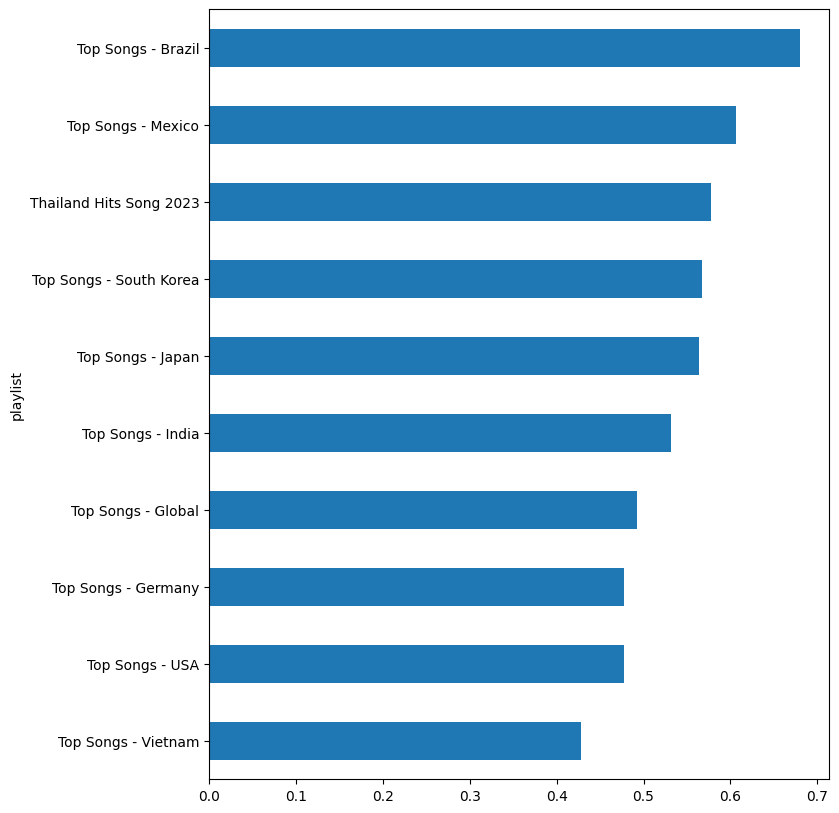

In [89]:
top50_df.groupby('playlist')['valence'].mean().sort_values().plot.barh(figsize = (8,10))

<AxesSubplot: ylabel='playlist'>

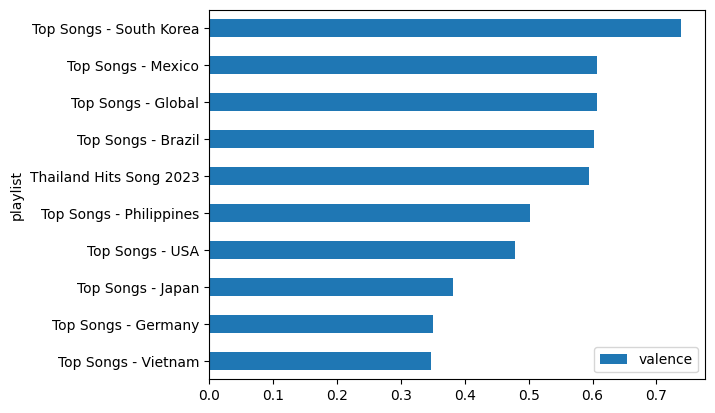

In [120]:
rank1 = top50_df[top50_df['rank'] == 1]
rank1
rank1.sort_values(by = 'valence').plot.barh(x = 'playlist', y = 'valence')

<AxesSubplot: xlabel='track popularity', ylabel='valence'>

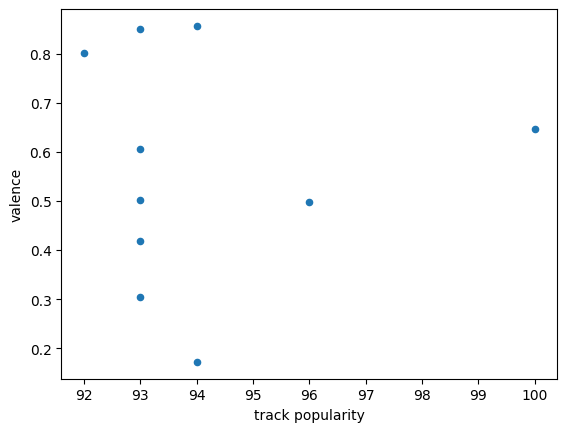

In [32]:
top50_df.sort_values(by = 'track popularity')[-10:].plot(y = 'valence', x = 'track popularity', kind = "scatter")

<AxesSubplot: ylabel='Frequency'>

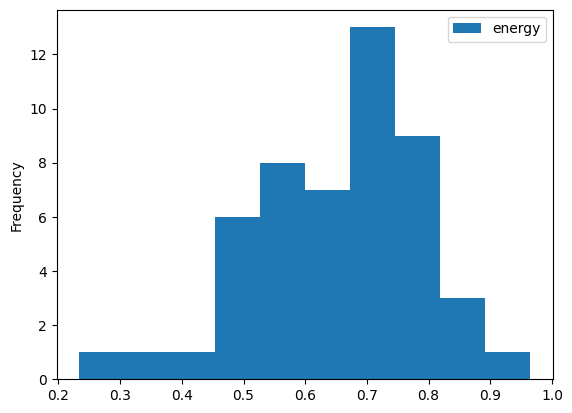

In [30]:
top50_df.plot(y = 'energy', kind = 'hist')

In [41]:
top50_df['energy'].describe()

count    50.000000
mean      0.652800
std       0.139459
min       0.234000
25%       0.556500
50%       0.676500
75%       0.748000
max       0.965000
Name: energy, dtype: float64

<AxesSubplot: ylabel='playlist'>

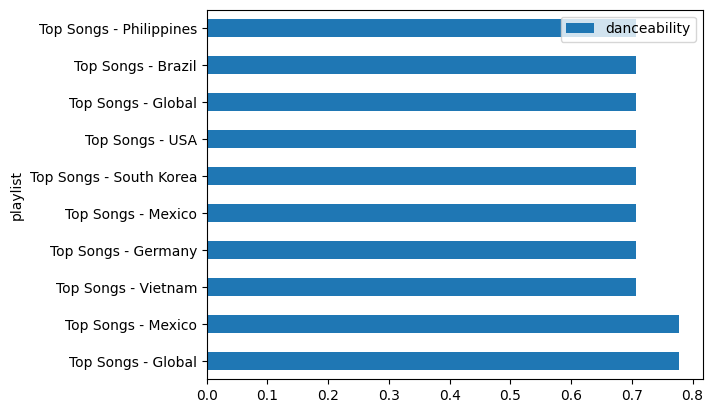

In [171]:
top50_df.sort_values(by = 'track popularity')[-10:].plot.barh(x = 'playlist', y = 'danceability')

In [169]:
# world happiness data
happiness_df = pd.read_csv('world-happiness-data.csv', header = 0, sep = ',')

# pre-processing to get only rows for countries in Spotify data
whdf = happiness_df.loc[(happiness_df['Country'] == 'Brazil') |
                 (happiness_df['Country'] == 'Germany') |
                 (happiness_df['Country'] == 'India') |
                 (happiness_df['Country'] == 'Japan') |
                 (happiness_df['Country'] == 'Mexico') |
                 (happiness_df['Country'] == 'South Korea') |
                 (happiness_df['Country'] == 'Thailand') |
                 (happiness_df['Country'] == 'United States') |
                (happiness_df['Country'] == 'Vietnam')]

# getting features of interest
wh_data = whdf[['RANK', 'Country', 'Happiness score', 'Whisker-high', 'Whisker-low',
       'Dystopia (1.83) + residual', 'Explained by: GDP per capita',
       'Explained by: Social support', 'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption']]


<AxesSubplot: ylabel='Country'>

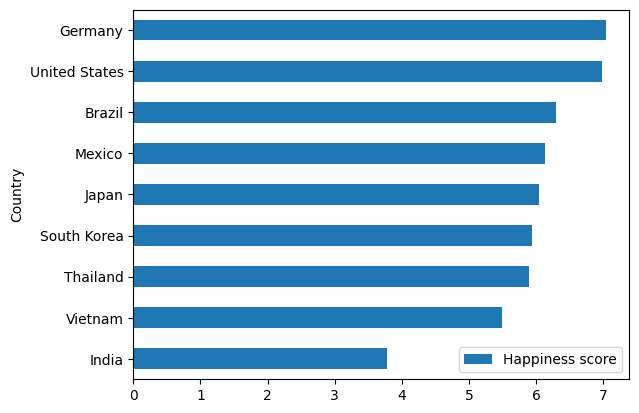

In [155]:
wh_data.sort_values(by = 'Happiness score').plot.barh(x = 'Country', y = 'Happiness score')

In [170]:
# world depression data
df = pd.read_csv('depression-data-2023.csv')

# pre-processing to get only rows for countries in Spotify data
depression_df = df.loc[(df['country'] == 'Brazil') |
                 (df['country'] == 'Germany') |
                 (df['country'] == 'India') |
                 (df['country'] == 'Japan') |
                 (df['country'] == 'Mexico') |
                 (df['country'] == 'South Korea') |
                 (df['country'] == 'Thailand') |
                 (df['country'] == 'United States') |
                (df['country'] == 'Vietnam')]

# getting features of interest
wd_data = depression_df[['country','region','prevalence', 'cases', 'pop2023']]


<AxesSubplot: xlabel='country'>

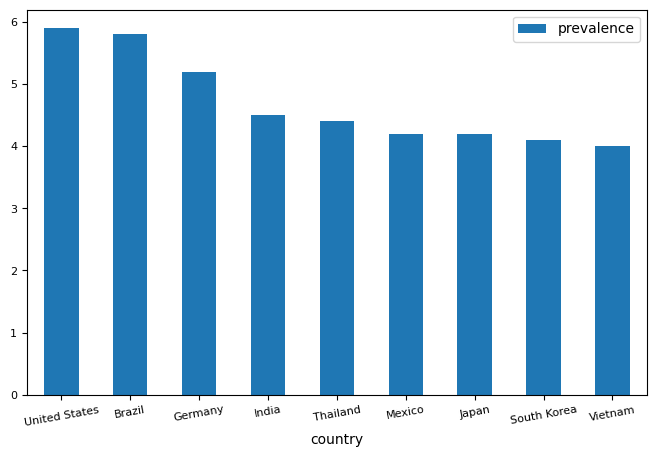

In [168]:
wd_data.plot(x = 'country', y = 'prevalence', kind = 'bar',rot = 10, fontsize = 8,figsize = (8,5))